<a href="https://colab.research.google.com/github/rupal-draft/Final-Year-Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#TESTING CODE
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# Load data
df = pd.read_csv("Centrality_Data_03.csv")
df

,UniProt_ID,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,SER_Y,Betweenness,Betweenness(Weight),Closeness,Closeness(Weight),Degree,Degree(Weight),Eigenvector,Eigenvector(Weight),Label
0,A0A096LP01,3.16,0.00,3.16,8.42,3.16,8.42,0.00,2.11,6.32,...,-0.30,0.00,0.0,0.25,0.15,1,0.41,0.00,0.00,0
1,A0AV02,6.72,1.96,2.66,5.18,5.88,9.10,1.40,4.90,2.66,...,-0.14,0.00,0.0,0.25,0.18,1,0.96,0.00,0.00,1
2,A0AV96,14.33,1.35,3.71,6.75,2.70,9.11,1.69,5.73,4.89,...,-0.24,217.02,178.0,0.34,0.20,10,4.73,0.00,0.00,1
3,A0AVF1,8.12,1.99,4.87,8.12,4.87,5.05,2.17,5.05,7.22,...,-0.24,0.00,0.0,0.23,0.13,1,0.53,0.00,0.00,1
4,A0AVI4,11.05,4.97,3.31,4.70,4.14,3.59,2.76,3.04,1.93,...,-0.14,162.24,153.0,0.29,0.18,4,2.31,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,Q9Y6Q6,8.12,6.17,4.87,7.47,2.60,9.42,1.95,1.62,4.06,...,-0.12,198.43,147.0,0.34,0.21,18,8.70,0.00,0.00,1
6235,Q9Y6R0,13.79,2.13,3.45,5.91,3.78,7.39,1.64,1.48,4.60,...,-0.06,7747.76,4350.0,0.40,0.27,49,26.76,0.01,0.01,1
6236,Q9Y6R9,7.62,0.78,4.49,8.20,2.15,8.59,1.95,2.15,3.91,...,-0.10,0.00,0.0,0.25,0.14,1,0.40,0.00,0.00,1
6237,Q9Y6Y0,5.92,3.43,5.45,6.70,3.43,7.32,2.34,4.21,5.14,...,-0.19,483.13,2065.0,0.31,0.19,4,2.69,0.00,0.00,1


In [3]:
# Drop identifier column
df = df.drop(columns=["UniProt_ID"])

In [4]:
# Split into features and target
X = df.drop(columns=["Label"]).values
y = df["Label"].values


In [5]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [7]:
# Train-test split
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size
dataset = TensorDataset(X_tensor, y_tensor)
train_data, test_data = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

In [29]:
# Define neural network
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.out(x))
        return x

model = Net(X_tensor.shape[1])

In [30]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
# Training loop
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/100], Loss: 0.5833
Epoch [2/100], Loss: 0.5374
Epoch [3/100], Loss: 0.5206
Epoch [4/100], Loss: 0.5100
Epoch [5/100], Loss: 0.4965
Epoch [6/100], Loss: 0.4846
Epoch [7/100], Loss: 0.4758
Epoch [8/100], Loss: 0.4619
Epoch [9/100], Loss: 0.4477
Epoch [10/100], Loss: 0.4389
Epoch [11/100], Loss: 0.4222
Epoch [12/100], Loss: 0.4092
Epoch [13/100], Loss: 0.3951
Epoch [14/100], Loss: 0.3871
Epoch [15/100], Loss: 0.3718
Epoch [16/100], Loss: 0.3603
Epoch [17/100], Loss: 0.3505
Epoch [18/100], Loss: 0.3391
Epoch [19/100], Loss: 0.3242
Epoch [20/100], Loss: 0.3151
Epoch [21/100], Loss: 0.3022
Epoch [22/100], Loss: 0.2916
Epoch [23/100], Loss: 0.2860
Epoch [24/100], Loss: 0.2755
Epoch [25/100], Loss: 0.2625
Epoch [26/100], Loss: 0.2556
Epoch [27/100], Loss: 0.2476
Epoch [28/100], Loss: 0.2401
Epoch [29/100], Loss: 0.2284
Epoch [30/100], Loss: 0.2244
Epoch [31/100], Loss: 0.2124
Epoch [32/100], Loss: 0.2062
Epoch [33/100], Loss: 0.2025
Epoch [34/100], Loss: 0.1910
Epoch [35/100], Loss: 0

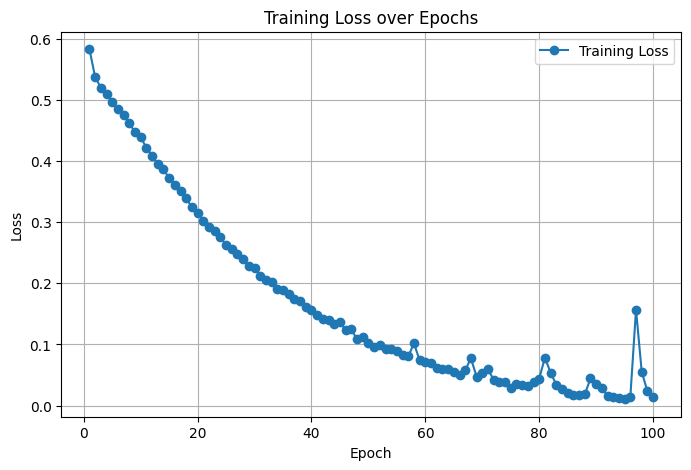

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        y_true.extend(yb.numpy())
        y_pred.extend(preds.numpy())

# Convert predictions to binary
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Metrics
accuracy = accuracy_score(y_true, y_pred_binary)
auc = roc_auc_score(y_true, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {auc:.4f}")


Test Accuracy: 0.9255
ROC AUC Score: 0.9308


Epoch 1/80, Loss: 0.5904
Epoch 2/80, Loss: 0.5378
Epoch 3/80, Loss: 0.5217
Epoch 4/80, Loss: 0.5089
Epoch 5/80, Loss: 0.4942
Epoch 6/80, Loss: 0.4830
Epoch 7/80, Loss: 0.4691
Epoch 8/80, Loss: 0.4552
Epoch 9/80, Loss: 0.4388
Epoch 10/80, Loss: 0.4305
Epoch 11/80, Loss: 0.4144
Epoch 12/80, Loss: 0.4002
Epoch 13/80, Loss: 0.3893
Epoch 14/80, Loss: 0.3832
Epoch 15/80, Loss: 0.3689
Epoch 16/80, Loss: 0.3558
Epoch 17/80, Loss: 0.3429
Epoch 18/80, Loss: 0.3360
Epoch 19/80, Loss: 0.3313
Epoch 20/80, Loss: 0.3117
Epoch 21/80, Loss: 0.3025
Epoch 22/80, Loss: 0.2933
Epoch 23/80, Loss: 0.2900
Epoch 24/80, Loss: 0.2716
Epoch 25/80, Loss: 0.2616
Epoch 26/80, Loss: 0.2571
Epoch 27/80, Loss: 0.2418
Epoch 28/80, Loss: 0.2462
Epoch 29/80, Loss: 0.2335
Epoch 30/80, Loss: 0.2219
Epoch 31/80, Loss: 0.2089
Epoch 32/80, Loss: 0.2048
Epoch 33/80, Loss: 0.1963
Epoch 34/80, Loss: 0.1867
Epoch 35/80, Loss: 0.1822
Epoch 36/80, Loss: 0.1707
Epoch 37/80, Loss: 0.1766
Epoch 38/80, Loss: 0.1583
Epoch 39/80, Loss: 0.

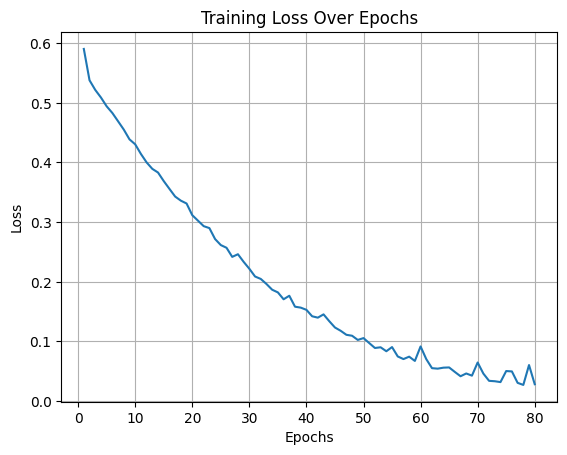

Accuracy: 0.9358974358974359
F1 Score: 0.9525504151838672
ROC AUC: 0.9276210605014953


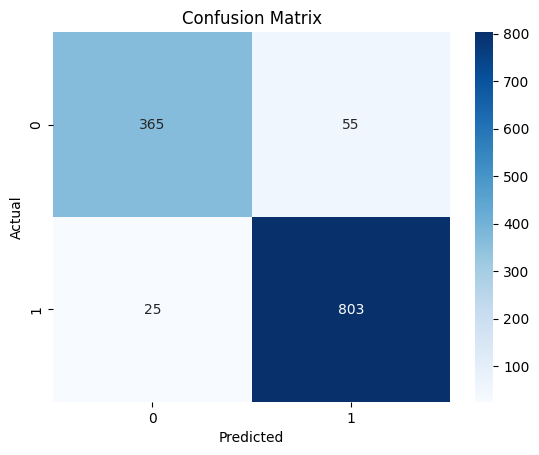

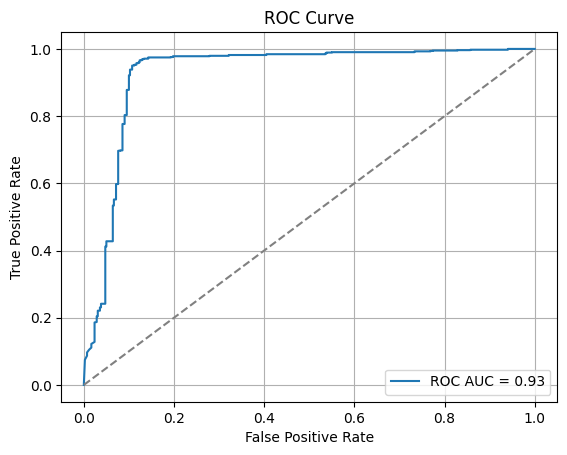

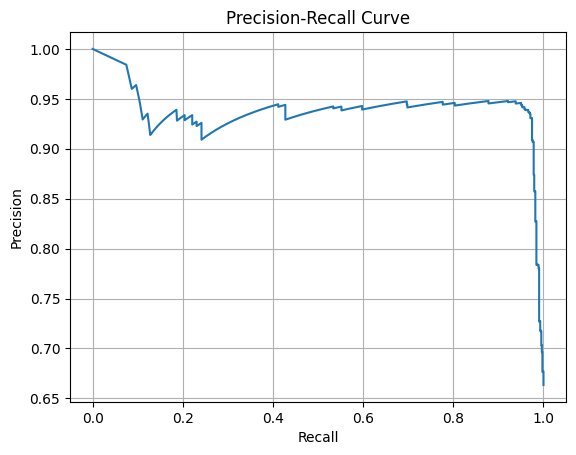

In [1]:
#FINAL CODE
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Load the data
df = pd.read_csv("Centrality_Data_03.csv")
# Drop identifier column
df = df.drop(columns=["UniProt_ID"])

feature_names = df.drop(columns=["Label"]).columns.tolist()


# Split features and labels
X = df.drop(columns=["Label"]).values
y = df["Label"].values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create datasets and loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = BinaryClassifier(X.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 80
losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot loss over epochs
plt.plot(range(1, epochs+1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

# Evaluation
model.eval()
with torch.no_grad():
    y_probs = model(X_test).numpy()
    y_preds = (y_probs >= 0.5).astype(int)

y_true = y_test.numpy()

with open('new_dl_model.pkl', 'wb') as f:
    pickle.dump((model, feature_names), f)

with open('test_data.pkl', 'wb') as f:
    pickle.dump((X_test, y_test), f)


# Metrics
print("Accuracy:", accuracy_score(y_true, y_preds))
print("F1 Score:", f1_score(y_true, y_preds))
print("ROC AUC:", roc_auc_score(y_true, y_probs))

# Confusion matrix
cm = confusion_matrix(y_true, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_true, y_probs):.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
